In [159]:
import pandas as pd
import requests
import json 
import numpy as np
import matplotlib.pyplot as pl

In [160]:
import os
import pickle
import geopandas as gpd
from shapely.geometry import Polygon, Point

In [161]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
data_location = '../../data/threshold_90percentile/ca_data_version_17.csv'

In [6]:
solar = pd.read_csv(data_location)

In [8]:
solar.columns


Index(['Latitude', 'Longitude', 'Solar_farm_present', 'State', 'panel.area',
       'power', 'panels', 'landscape.area', 'water', 'urban', 'Address',
       'land_cover', 'slope', 'elevation', 'feature_violated', 'solrad_annual',
       'ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly',
       'ac_annual', 'min_distance'],
      dtype='object')

In [11]:
solar

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,40.633080,-122.314591,1.0,CA,0.026765,1.910786,702.0,0.026765,0.0,0.0,...,1.0,185.0,NaN,5.573046,"[93473.66454398488, 78248.05013653943, 124645....","[117.3458680717152, 99.39957511771797, 162.198...","[3.785350582958554, 3.549984825632785, 5.23220...","[98052.30037706059, 82286.97517169513, 130677....",1.506568e+06,13.5433
1,40.496202,-122.293018,1.0,CA,0.014312,1.127613,3.0,0.014312,0.0,0.0,...,0.0,149.0,NaN,5.522022,"[74592.6287811629, 83370.48168344896, 130088.9...","[93.63007508626477, 105.692206308516, 169.3173...","[3.020325002782735, 3.774721653875571, 5.46184...","[78508.67122917825, 87613.00205050594, 136325....",1.490699e+06,14.0202
2,38.267033,-122.271446,1.0,CA,0.034076,NaN,3.0,0.034076,0.0,1.0,...,1.0,9.0,NaN,5.622299,"[92126.2550424327, 89064.40533523557, 128839.5...","[112.333561105272, 111.1445319302946, 165.0815...","[3.623663261460389, 3.969447568939093, 5.32521...","[96676.26859564037, 93532.47717835204, 135056....",1.573588e+06,6.6744
3,38.227924,-122.098865,1.0,CA,0.032722,2.263317,4.0,0.032722,0.0,0.0,...,0.0,10.0,NaN,5.836747,"[95636.588127896, 114983.9387991452, 140340.06...","[116.0314314180241, 143.7299506017422, 177.809...","[3.742949400581423, 5.133212521490793, 5.73580...","[100311.9908810605, 120432.7997151909, 147046....",1.650112e+06,8.4137
4,37.719517,-121.904712,1.0,CA,0.028839,NaN,5.0,0.030839,0.0,1.0,...,2.0,117.0,NaN,5.903124,"[90133.33737603408, 113757.4022359532, 148714....","[111.0064981450139, 141.8326228652107, 188.570...","[3.580854778871415, 5.065450816614666, 6.08292...","[94625.84469786189, 119241.6885916102, 155706....",1.669385e+06,8.5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,35.509902,-117.741209,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,893.0,elevation,6.772165,"[140155.037816104, 142690.7610603621, 174689.4...","[172.7367636461938, 177.9331387379986, 224.187...","[5.572153666006252, 6.354754954928521, 7.23185...","[147069.9752812751, 150141.2937065304, 183112....",1.896676e+06,128.4981
499,36.116080,-121.710559,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,5.264481,"[103682.9009092766, 109905.5905577235, 128368....","[128.4310139816238, 137.6831410647575, 162.049...","[4.142935934891091, 4.917255038027052, 5.22738...","[108732.957413404, 115171.5924430281, 134552.8...",1.502828e+06,76.2163
500,36.663595,-117.654919,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,471.0,min_distance,6.357913,"[121393.8004000156, 132728.1730159485, 165071....","[152.5546436719589, 165.1048259660599, 213.974...","[4.921117537805126, 5.896600927359282, 6.90241...","[127320.9370007656, 139276.714958155, 172763.7...",1.751840e+06,441.2316
501,40.163782,-124.320839,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.781651,"[80354.84454792064, 82132.51746527478, 112807....","[97.78194591867091, 100.2570567613625, 139.406...","[3.154256319957126, 3.580609170048663, 4.49699...","[84446.8080913913, 86333.30030479735, 118542.9...",1.408669e+06,337.2982


In [13]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,501.000000
mean,36.103329,-118.616248,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.870775,2.840954,571.107356,6.212098,1.730380e+06,123.834827
std,2.486942,2.524943,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.335782,6.211940,538.837805,0.516449,1.341367e+05,122.603335
min,32.615893,-124.407129,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,34.365987,-120.761367,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,87.000000,5.835805,1.636359e+06,24.287700
50%,35.177482,-118.302095,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,464.000000,6.432494,1.768725e+06,76.750000
75%,37.719517,-116.490000,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,862.500000,6.641045,1.844857e+06,195.860900
max,41.982314,-114.354317,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [15]:
solar = solar.drop(labels=np.where(np.isnan(solar['min_distance'].values))[0],axis=0)

In [82]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,501.000000,501.000000,501.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,501.000000
mean,36.116197,-118.616813,0.405190,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.874251,2.852295,573.387226,6.215157,1.731014e+06,123.834827
std,2.483522,2.529959,0.491419,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.331897,6.221747,538.700011,0.514970,1.339643e+05,122.603335
min,32.615893,-124.407129,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,34.375764,-120.761367,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,90.000000,5.836747,1.636829e+06,24.287700
50%,35.197037,-118.302095,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,469.000000,6.442618,1.768725e+06,76.750000
75%,37.719517,-116.490000,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,863.000000,6.641066,1.844929e+06,195.860900
max,41.982314,-114.354317,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [94]:
req_col = ['land_cover','slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X = solar[req_col]
Y = solar['Solar_farm_present']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

sd = StandardScaler()
columns_ML_excluding_LC = ['slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X_train_excluding_LC = X_train[columns_ML_excluding_LC ]
temp = np.hstack((sd.fit_transform(X_train_excluding_LC),X_train['land_cover'].values.reshape((-1,1))))
X_train_2 = pd.DataFrame(temp, columns = columns_ML_excluding_LC + ['land_cover'])

X_test_excluding_LC = X_test[columns_ML_excluding_LC ]
temp = np.hstack((sd.transform(X_test_excluding_LC),X_test['land_cover'].values.reshape((-1,1))))
X_test_2 = pd.DataFrame(temp, columns = columns_ML_excluding_LC+['land_cover'])


assert np.sum(np.abs(X_test_2['land_cover'].values - X_test['land_cover'].values)) == 0
assert np.sum(np.abs(X_train_2['land_cover'].values - X_train['land_cover'].values)) == 0

X_test = X_test_2
X_train = X_train_2


In [270]:
len(X_train),len(X_test)

(400, 101)

In [271]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state= 113)

params = {"C":(0.1, 1, 2,4),  
          "kernel":('linear', 'rbf','poly')}

svm_cv = GridSearchCV(svm, params, scoring="accuracy", n_jobs=-1, verbose=2, cv=5)
svm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(cv=5, estimator=SVC(gamma=0.1, random_state=113), n_jobs=-1,
             param_grid={'C': (0.1, 1, 2, 4),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy', verbose=2)

In [272]:
svm_cv.best_params_

{'C': 1, 'kernel': 'linear'}

In [273]:
# svm_tuned = SVC(**svm_cv.best_params_, random_state=113)
svm_tuned = SVC(C=1,kernel='rbf',random_state=113)
svm_tuned.fit(X_train, y_train)
y_pred_train_svm = svm_tuned.predict(X_train) 
y_pred_test_svm = svm_tuned.predict(X_test)

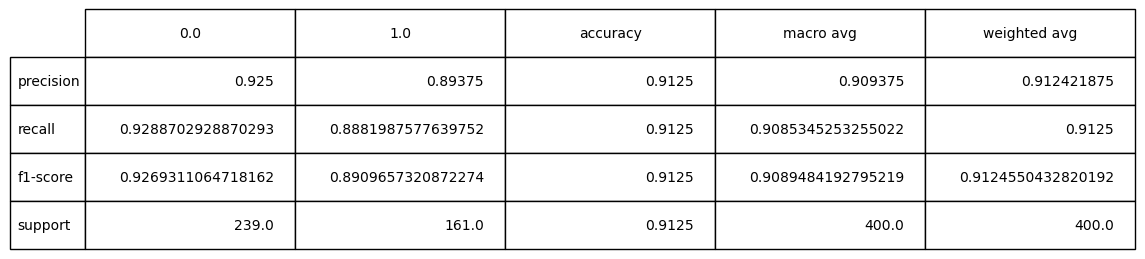

In [274]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_svm, output_dict=True))
fig, ax = pl.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

In [275]:
print(np.sum(np.abs(y_pred_train_svm - y_train.values))/len(y_train))
print(np.sum(np.abs(y_pred_test_svm - y_test.values))/len(y_test))

0.0875
0.12871287128712872
